# Using Boston Housing Data From Sklearn #

This simple project checks out the Boston Housing Data from scikit-learn.  Scikit-learn has a lot of datasets available in sklearn.datasets to developers to try out.

This project uses matplotlib and scikit-learn to plot the features of this dataset as well as use models to predict the target value.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the dataset ####

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

#### Printing out the dataset description ####

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Adding the dataset target into the dataframe ####

In [5]:
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Checking the correlaton between the features of the dataset ####

In [6]:
cdata = boston_df.corr()
cdata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Put the correlation into a heatmap for a better visualization ####

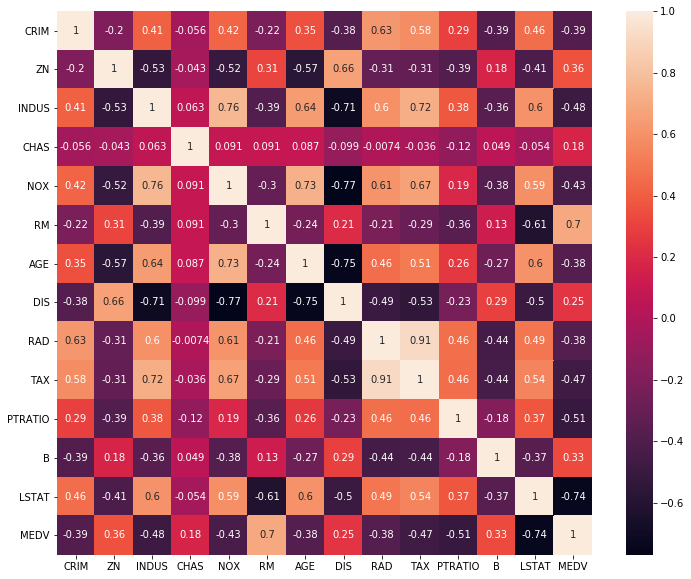

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data=cdata, annot=True)

### Plotting some features against target ###

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

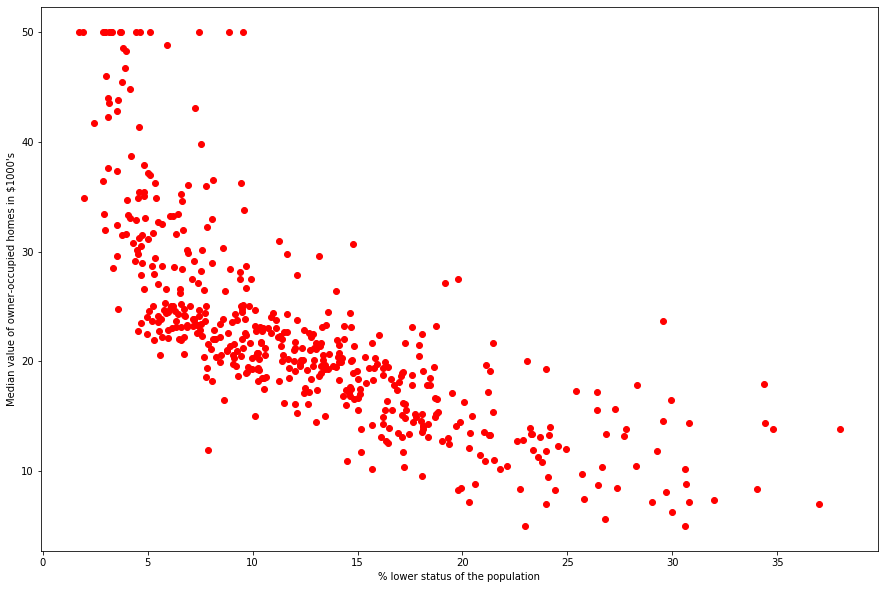

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(boston_df['LSTAT'], boston_df['MEDV'], c='r')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

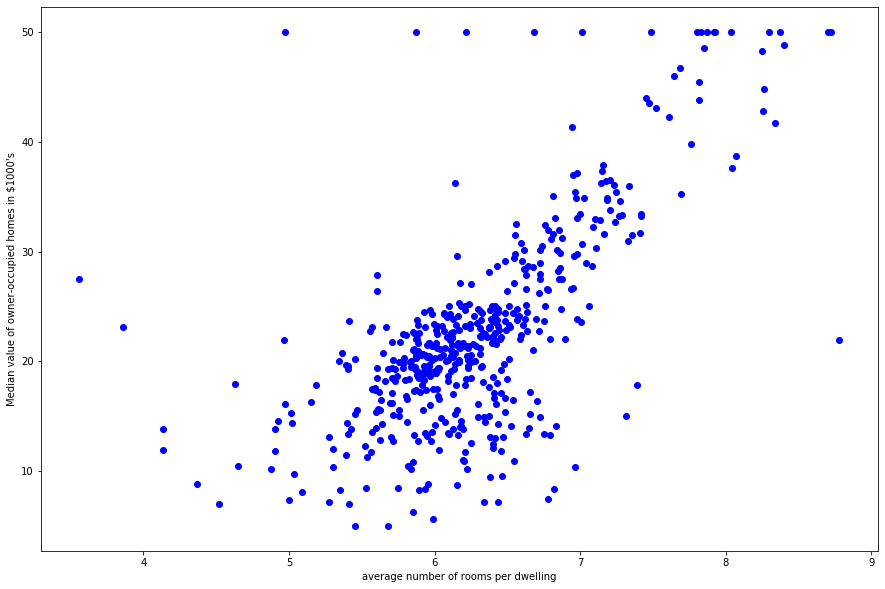

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(boston_df['RM'], boston_df['MEDV'], c='b')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

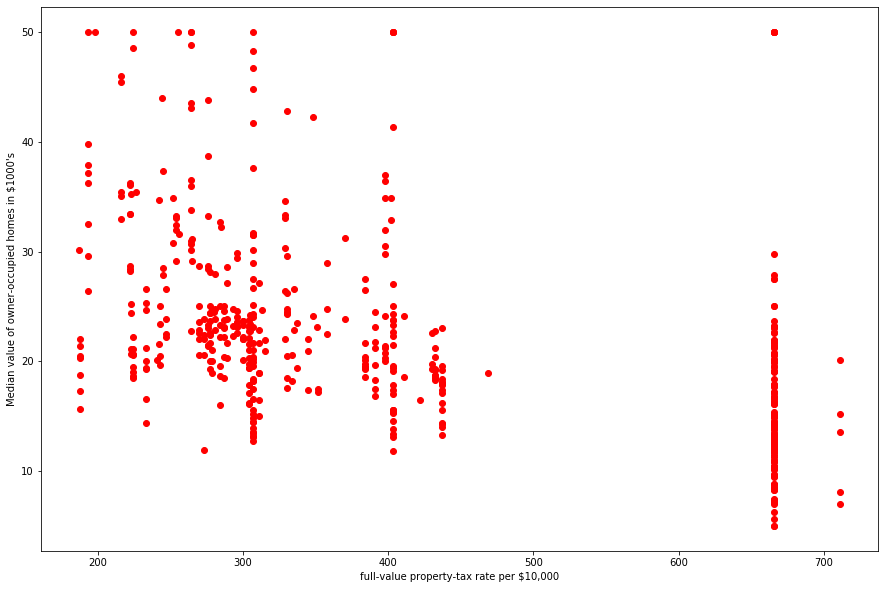

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(boston_df['TAX'], boston_df['MEDV'], c='r')
plt.xlabel('full-value property-tax rate per $10,000')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

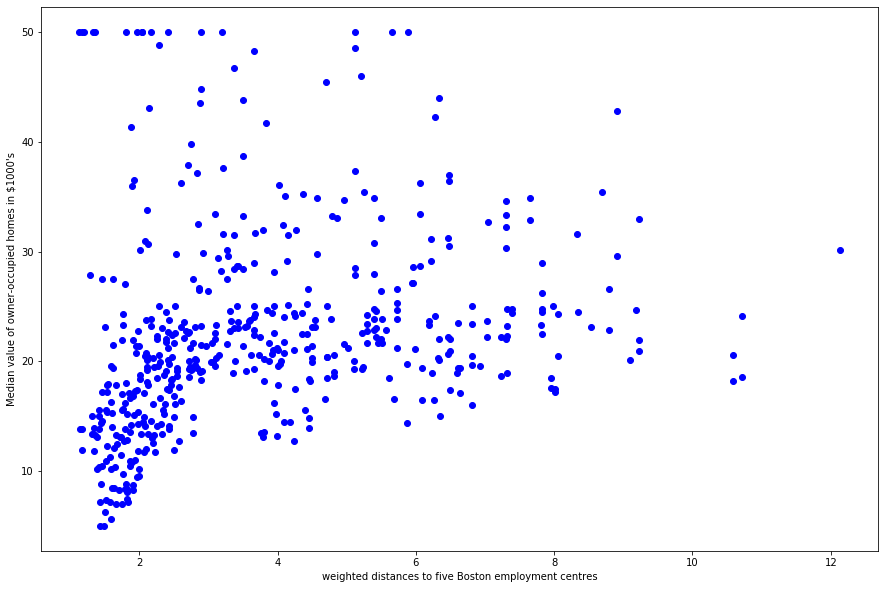

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(boston_df['DIS'], boston_df['MEDV'], c='b')
plt.xlabel('weighted distances to five Boston employment centres')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')

### Using Linear Regression to predict target value ###

#### Using only TAX and DIS as features ####

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[boston_df['TAX'],boston_df['DIS']], columns=['TAX','DIS'])
Y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  78.3682757411825
R2 Score:  0.037581014151462866


#### Using only LSTAT and RM as features ####

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[boston_df['LSTAT'],boston_df['RM']], columns=['LSTAT','RM'])
Y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  37.38310563877996
R2 Score:  0.5409084827186417


### Using a Gradient Boosting Regressor to predict target value ###
#### Using LSTAT, RM, TAX and DIS as features ####

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[boston_df['LSTAT'],boston_df['RM'],boston_df['TAX'],boston_df['DIS']], 
                 columns=['LSTAT','RM', 'TAX', 'DIS'])
Y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
clf = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  18.161289240838233
R2 Score:  0.7769662608043781


Using different models and including/excluding features would yield different scores against the test set.